In [33]:
from Convert_Kol import Convert_Kol
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math
from scipy.stats import norm
import pylab as pl

In [2]:
path = os.path.join(os.getcwd(),'mr_A')

In [3]:
Convert_Kol(path,'CSV_Mr_A')

In [4]:
path = os.path.join(os.getcwd(),'CSV_Mr_A.csv')

In [5]:
Mr_A_Data=pd.read_csv(path)

In [6]:
Volumn_Data=Mr_A_Data.iloc[:,2:4]

In [7]:
Volumn_Data = Volumn_Data.groupby('time').sum()

In [8]:
Volumn_Data['time']=Volumn_Data.index

In [9]:
Volumn_Data.index.names = ['index']

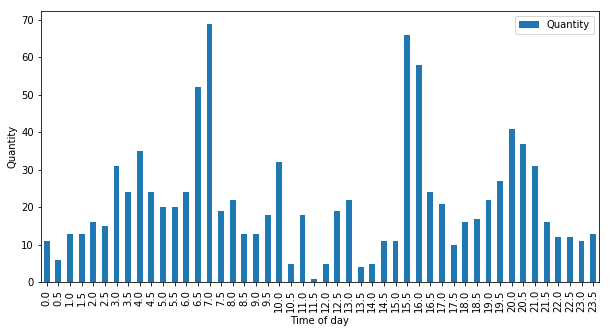

In [10]:
Volumn_Plot = Volumn_Data.plot(x='time',y='Quantity',kind='bar',figsize=(10,5))
Volumn_Plot.set_ylabel('Quantity')
Volumn_Plot.set_xlabel('Time of day')

In [11]:
Mr_A_Data.head(5)

,Month,Day,time,Quantity,Cost
0,May,24,15.0,2,26575000.0
1,May,24,15.5,4,27150000.0
2,May,24,16.5,1,27150000.0
3,May,24,18.5,1,27100000.0
4,May,24,19.0,1,27000000.0


In [12]:
Price_Data = Mr_A_Data.iloc[:,2:]

In [13]:
Price_Data['Total Cost']=Price_Data['Quantity']*Price_Data['Cost']
Price_Data=Price_Data.iloc[:,[0,1,3]]
Price_Data = Price_Data.groupby('time').sum()
Price_Data['Mean Cost']=Price_Data['Total Cost']/Price_Data['Quantity']
Price_Data['Time']=Price_Data.index
Price_Data=Price_Data.iloc[:,2:]
Price_Data['Mean Cost']=Price_Data['Mean Cost']-min(Price_Data['Mean Cost'])

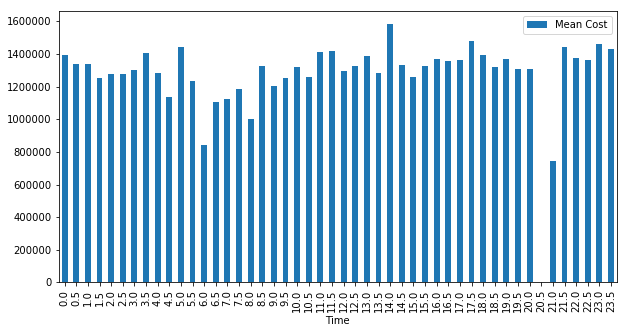

In [14]:
Price_Plot = Price_Data.plot(x='Time',y='Mean Cost',kind='bar',figsize=(10,5))
Volumn_Plot.set_ylabel('Cost over min')
Volumn_Plot.set_xlabel('Time of day')

In [15]:
Price_Freq = Mr_A_Data.iloc[:,3:]
Price_Freq['Cost']=Price_Freq['Cost'].apply(lambda x: math.floor(x/100000))
Price_Freq=Price_Freq.groupby('Cost').sum()
Price_Freq['Cost']=Price_Freq.index

In [16]:
Price_Freq.head(20)

,Quantity,Cost
Cost,,
240.0,3,240.0
250.0,34,250.0
260.0,4,260.0
264.0,7,264.0
265.0,9,265.0
266.0,13,266.0
267.0,19,267.0
268.0,72,268.0
269.0,60,269.0


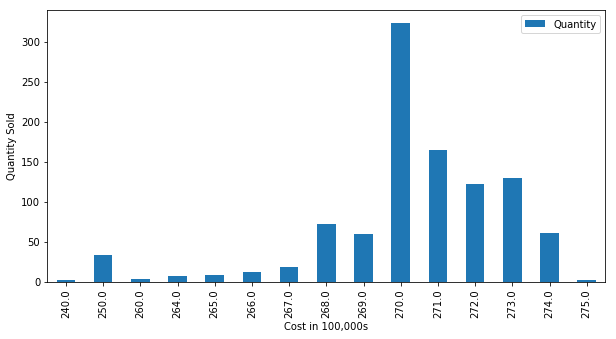

In [17]:
Price_Freq_Plot = Price_Freq.plot(x='Cost',y='Quantity',kind='bar',figsize=(10,5))
Price_Freq_Plot.set_ylabel('Quantity Sold')
Price_Freq_Plot.set_xlabel('Cost in 100,000s')

In [18]:
from Mean_SD import Mean_SD

In [19]:
temp = Mean_SD(Price_Freq['Cost'],Price_Freq['Quantity'])

In [20]:
temp

[269.85170731707319, 0.14055370917660948]

In [30]:
a = norm.pdf(temp[0],temp[1])

In [22]:
a

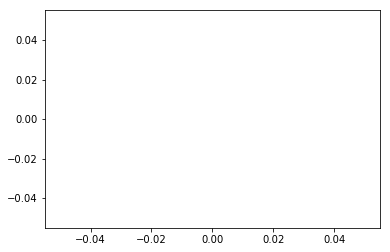

In [34]:
pl.plot(a)